In [ ]:
#Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.calibration import LabelEncoder
import re
from sklearn import metrics

Importing and Loading Dataset

In [ ]:
df1 = pd.read_csv('ResaleFlatPricesBasedonApprovalDate19901999.csv')
df2= pd.read_csv('ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
df3= pd.read_csv('ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')
df4= pd.read_csv('ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv')
df5= pd.read_csv('ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

In [ ]:
#Combining tha multi dataframe into one dataset
df = pd.concat([df1 , df2 , df3, df4, df5],axis=0)
df.head()
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
177567,2024-04,YISHUN,EXECUTIVE,652,YISHUN AVE 4,07 TO 09,181.0,Apartment,1992,1080000.0,67 years 03 months
177568,2024-04,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,142.0,Apartment,1988,780888.0,63 years 03 months
177569,2024-04,YISHUN,EXECUTIVE,324,YISHUN CTRL,04 TO 06,146.0,Apartment,1988,830000.0,63 years 04 months
177570,2024-04,YISHUN,EXECUTIVE,326,YISHUN RING RD,04 TO 06,146.0,Maisonette,1988,880000.0,63 years 04 months


In [ ]:
# Check data count
df.shape

(923775, 11)

In [ ]:
# Check data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 923775 entries, 0 to 177571
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                923775 non-null  object 
 1   town                 923775 non-null  object 
 2   flat_type            923775 non-null  object 
 3   block                923775 non-null  object 
 4   street_name          923775 non-null  object 
 5   storey_range         923775 non-null  object 
 6   floor_area_sqm       923775 non-null  float64
 7   flat_model           923775 non-null  object 
 8   lease_commence_date  923775 non-null  int64  
 9   resale_price         923775 non-null  float64
 10  remaining_lease      214725 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 84.6+ MB


In [ ]:
#Handling Null values

df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [ ]:
df['remaining_lease'] = df['remaining_lease'].fillna('0')


In [ ]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
dtype: int64

In [ ]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [ ]:
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [ ]:
#replacing MULTI-GENERATION with MULTI GENERATION

df.loc[df['flat_type'] == 'MULTI-GENERATION', 'flat_type'] = 'MULTI GENERATION'
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

In [ ]:
df['floor_area_sqm'].unique()

array([ 31. ,  73. ,  67. ,  82. ,  74. ,  88. ,  89. ,  83. ,  68. ,
        75. ,  81. ,  91. ,  92. ,  97. ,  90. ,  98. ,  99. , 100. ,
        93. , 103. , 119. , 120. , 118. , 121. , 135. , 117. ,  45. ,
        65. ,  59. ,  70. ,  76. ,  84. , 104. , 105. , 125. , 132. ,
       139. , 123. , 143. , 151. ,  69. , 106. , 107. , 116. , 149. ,
       141. , 146. , 148. , 145. , 154. , 150. ,  29. ,  51. ,  61. ,
        63. ,  64. ,  72. ,  58. ,  66. ,  60. ,  53. ,  54. ,  56. ,
        77. , 133. , 131. , 115. ,  43. ,  38. ,  41. ,  85. , 111. ,
       101. , 112. , 137. , 127. , 147. , 163. ,  50. ,  40. ,  60.3,
        62. ,  55. ,  57. ,  52. ,  63.1, 102. ,  83.1, 126. , 140. ,
       142. ,  71. , 108. , 144. ,  96. , 114. , 157. , 152. , 155. ,
        87. , 109. , 110. ,  94. , 134. , 122. , 128. ,  78. ,  46. ,
        42. ,  49. ,  47. ,  86. , 156. ,  79. ,  80. , 124. ,  28. ,
       113. ,  95. , 160. , 136. ,  48. , 138. , 161. ,  39. , 130. ,
       159. , 206. ,

In [ ]:
df['block'].unique()

array(['309', '216', '211', ..., '606C', '605D', '460B'], dtype=object)

In [ ]:
# Converting the block column to int
df.loc[:, 'block'] = df['block'].astype(str)
df.loc[:, 'block'] = df['block'].apply(lambda x: ''.join(char for char in x if char in '0123456789'))


In [ ]:
df['flat_model'].unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [ ]:
df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [ ]:
df['month'].unique()

array(['1990-01', '1990-02', '1990-03', '1990-04', '1990-05', '1990-06',
       '1990-07', '1990-08', '1990-09', '1990-10', '1990-11', '1990-12',
       '1991-01', '1991-02', '1991-03', '1991-04', '1991-05', '1991-06',
       '1991-07', '1991-08', '1991-09', '1991-10', '1991-11', '1991-12',
       '1992-01', '1992-02', '1992-03', '1992-04', '1992-05', '1992-06',
       '1992-07', '1992-08', '1992-09', '1992-10', '1992-11', '1992-12',
       '1993-01', '1993-02', '1993-03', '1993-04', '1993-05', '1993-06',
       '1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12',
       '1994-01', '1994-02', '1994-03', '1994-04', '1994-05', '1994-06',
       '1994-07', '1994-08', '1994-09', '1994-10', '1994-11', '1994-12',
       '1995-01', '1995-02', '1995-03', '1995-04', '1995-05', '1995-06',
       '1995-07', '1995-08', '1995-09', '1995-10', '1995-11', '1995-12',
       '1996-01', '1996-02', '1996-03', '1996-04', '1996-05', '1996-06',
       '1996-07', '1996-08', '1996-09', '1996-10', 

In [ ]:
#splitting month column to year and month
df.loc[:, 'reg_year'] = df['month'].apply(lambda x: int(x.split('-')[0]))
df.loc[:, 'reg_month'] = df['month'].apply(lambda x: int(x.split('-')[1]))


In [ ]:
df['lease_commence_date'].unique()

array([1977, 1976, 1978, 1979, 1984, 1980, 1985, 1981, 1982, 1986, 1972,
       1983, 1973, 1969, 1975, 1971, 1974, 1967, 1970, 1968, 1988, 1987,
       1989, 1990, 1992, 1993, 1994, 1991, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 1966, 2002, 2006, 2003, 2005, 2004, 2008, 2007, 2009,
       2010, 2012, 2011, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2022,
       2020])

In [ ]:
df['street_name'].unique()

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

          flat_type  flat_model
0            1 ROOM           2
1            2 ROOM           9
2            3 ROOM          15
3            4 ROOM          18
4            5 ROOM          17
5         EXECUTIVE           8
6  MULTI GENERATION           2


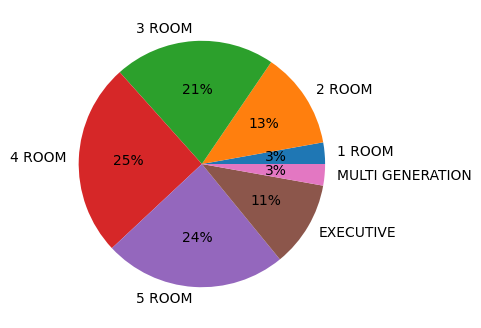

In [ ]:
temp = pd.DataFrame(df.groupby('flat_type')['flat_model'].nunique()).reset_index()
print(temp)
plt.figure(figsize = (5,4))
plt.pie(temp['flat_model'], labels = temp['flat_type'], autopct = '%.0f%%')
plt.show()

<Axes: title={'center': 'floor area distribution of flat type'}, xlabel='flat_type', ylabel='floor_area_sqm'>

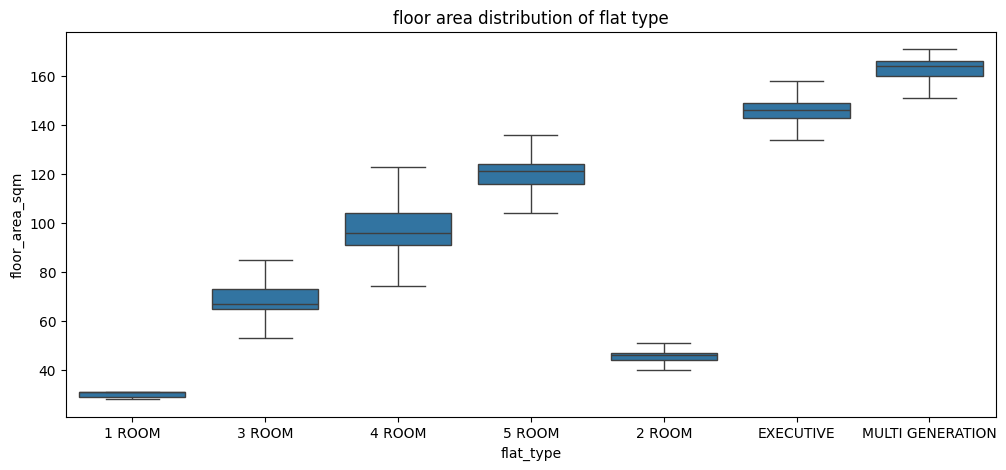

In [ ]:
import seaborn as sns

plt.figure(figsize = (12,5))
plt.title('floor area distribution of flat type')
sns.boxplot(x = 'flat_type', y ='floor_area_sqm', data = df, showfliers = False)

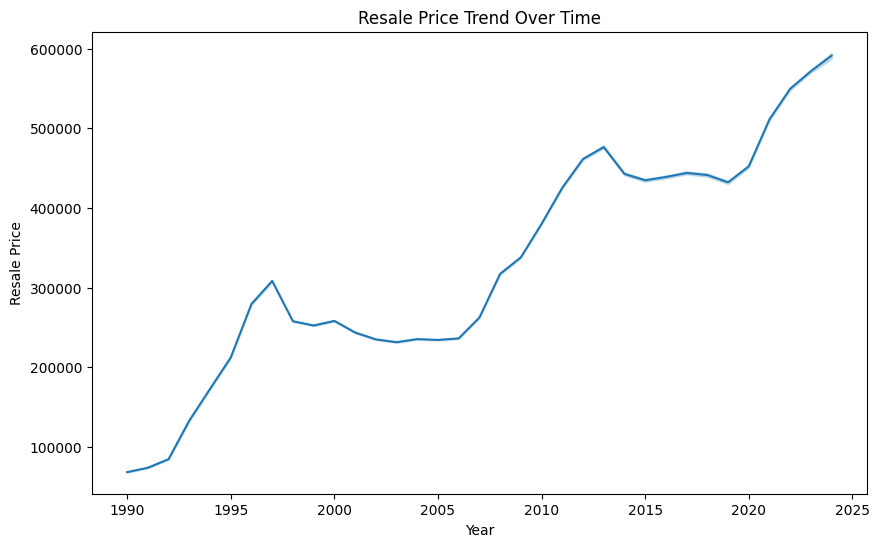

In [ ]:
df.loc[:, 'lease_commence_date'] = df['lease_commence_date']

plt.figure(figsize=(10, 6))
sns.lineplot(x='reg_year', y='resale_price', data=df)
plt.title('Resale Price Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Resale Price')
plt.show()

In [ ]:
# Use LabelEncoder to convert 'street_name','flat_model' ,'flat_type' ,'town' to numeric

label_encoder = LabelEncoder()
df.loc[:, 'street_name'] = label_encoder.fit_transform(df['street_name']).astype('int32')

In [ ]:
label_encoder = LabelEncoder()
df.loc[:, 'flat_type'] = label_encoder.fit_transform(df['flat_type'])

In [ ]:
label_encoder = LabelEncoder()
df.loc[:, 'flat_model'] = label_encoder.fit_transform(df['flat_model'])

In [ ]:
label_encoder = LabelEncoder()
df.loc[:, 'town'] = label_encoder.fit_transform(df['town'])

In [ ]:
label_encoder = LabelEncoder()
df.loc[:, 'storey_range'] = label_encoder.fit_transform(df['storey_range'])

In [ ]:
df.drop(columns='month', inplace=True)

In [ ]:
df.head()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,reg_year,reg_month
0,0,0,309,13,5,31.0,7,1977,9000.0,0,1990,1
1,0,0,309,13,2,31.0,7,1977,6000.0,0,1990,1
2,0,0,309,13,5,31.0,7,1977,8000.0,0,1990,1
3,0,0,309,13,4,31.0,7,1977,6000.0,0,1990,1
4,0,2,216,13,2,73.0,20,1976,47200.0,0,1990,1


In [ ]:
df.drop("remaining_lease",inplace = True , axis = 1)

In [ ]:
df['street_name'].unique()

array([13, 16, 17, 14, 18, 20, 19, 21, 15, 45, 42, 50, 340, 39, 47, 115,
       114, 38, 49, 48, 41, 43, 36, 37, 35, 40, 116, 437, 425, 70, 86, 84,
       71, 68, 67, 200, 65, 75, 66, 448, 487, 52, 488, 166, 490, 236, 199,
       228, 90, 198, 92, 489, 178, 292, 385, 226, 197, 241, 248, 235, 294,
       335, 492, 299, 298, 175, 382, 181, 242, 345, 424, 397, 505, 510,
       380, 97, 393, 392, 30, 438, 509, 484, 486, 143, 512, 142, 145, 144,
       141, 513, 151, 152, 149, 99, 146, 150, 139, 322, 246, 192, 176,
       434, 5, 189, 163, 366, 196, 31, 238, 191, 177, 208, 210, 205, 218,
       206, 318, 216, 212, 217, 483, 255, 260, 256, 257, 258, 259, 347,
       579, 201, 227, 61, 60, 62, 271, 268, 261, 269, 233, 441, 342, 186,
       33, 514, 504, 51, 517, 320, 285, 188, 167, 346, 291, 232, 338, 501,
       247, 290, 2, 300, 162, 324, 325, 327, 100, 102, 481, 101, 170, 323,
       194, 169, 442, 334, 203, 202, 204, 168, 398, 319, 420, 415, 417,
       418, 458, 460, 480, 475, 450, 461, 

<Axes: title={'center': 'Correlation Matrix'}>

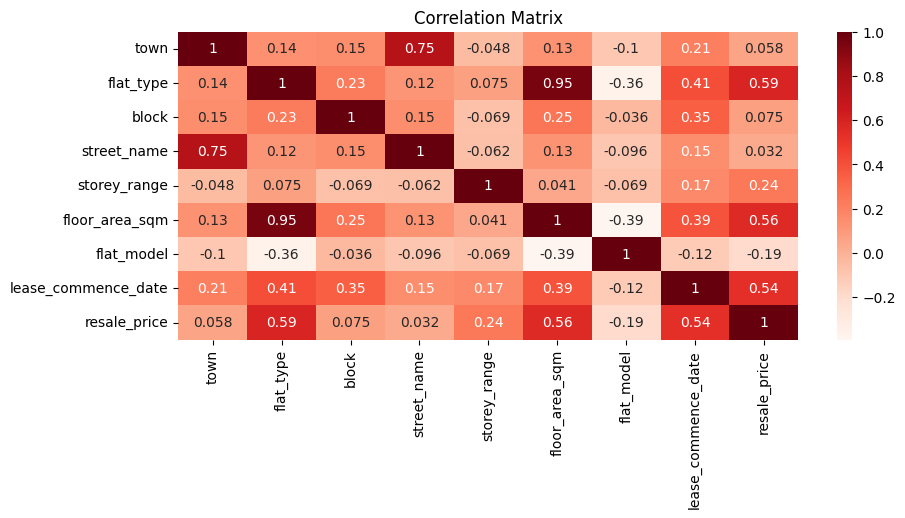

In [ ]:
feature_cols = ['town', 'flat_type', 'block', 'street_name', 'storey_range','floor_area_sqm', 'flat_model', 'lease_commence_date',
                 'resale_price']
plt.figure(figsize = (10,4))
plt.title('Correlation Matrix')
sns.heatmap(df[feature_cols].corr(),cmap="Reds", annot = True)

In [ ]:
# Split the data into features and target
x = df[['town','flat_type','block','street_name','storey_range','storey_range','flat_model','lease_commence_date','reg_year','reg_month']]
y = df['resale_price']

In [ ]:
#Model Selection and Training

from sklearn.model_selection import train_test_split

# Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train

,town,flat_type,block,street_name,storey_range,storey_range,flat_model,lease_commence_date,reg_year,reg_month
170261,3,3,291,73,4,4,16,1998,2005,2
278322,8,3,609,137,2,2,12,1996,1999,10
175371,21,3,190,389,5,5,16,2000,2024,3
203498,23,3,381,464,5,5,12,1993,1998,7
307206,5,3,630,413,15,15,23,2004,2009,12
...,...,...,...,...,...,...,...,...,...,...
259178,11,2,328,210,5,5,20,1983,1999,6
78642,25,4,214,330,13,13,9,1981,2002,2
131932,1,2,537,42,2,2,20,1980,1996,8
14308,21,3,275,157,0,0,23,2009,2012,9


In [ ]:
#linear_regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

linear_regression = LinearRegression()
linear_regression.fit(x_train , y_train)
y_pred = linear_regression.predict(x_test)

print(f'MAE = {metrics.mean_absolute_error(y_test,y_pred)}')
print(f'MSE = {metrics.mean_squared_error(y_test,y_pred)}')
print(f'RMSE  = {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}')
print(f'R2 Score = {linear_regression.score(x_test,y_test)}')

MAE = 61402.36450318864
MSE = 6817889567.709962
RMSE  = 82570.51270102398
R2 Score = 0.7634501564256703


In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regressor.fit(x_train, y_train)
y_pred = decision_tree_regressor.predict(x_test)

print(f'MAE is - {metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MAE is - {metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE is - {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'R2 Score is - {decision_tree_regressor.score(x_test, y_test)}')

MAE is - 20305.439926507563
MAE is - 937529213.025186
RMSE is - 30619.09882777718
R2 Score is - 0.9674719887312633


In [ ]:
#saving the decisiontree model
import pickle
with open ('dt.pkl', 'wb') as f:
    pickle.dump(decision_tree_regressor , f)

In [ ]:
categorical_columns = ['town', 'flat_type', 'block', 'street_name', 'flat_model']

# Create a dictionary to store unique values before and after encoding
unique_values_dict = {}

for column in categorical_columns:
    # Store unique values before encoding
    unique_values_dict[f'{column}_before'] = df[column].unique().tolist()

    # Perform ordinal encoding
    le = LabelEncoder()
    df[column] = le.fit_transform(df[[column]])

    # Store unique values after encoding
    unique_values_dict[f'{column}_after'] = df[column].unique().tolist()

# Now unique_values_dict contains unique values before and after ordinal encoding
unique_values_dict


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

{'town_before': [0,
  1,
  2,
  3,
  4,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  16,
  19,
  21,
  22,
  23,
  24,
  25,
  26,
  15,
  20,
  5,
  17,
  18],
 'town_after': [0,
  1,
  2,
  3,
  4,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  16,
  19,
  21,
  22,
  23,
  24,
  25,
  26,
  15,
  20,
  5,
  17,
  18],
 'flat_type_before': [0, 2, 3, 4, 1, 5, 6],
 'flat_type_after': [0, 2, 3, 4, 1, 5, 6],
 'block_before': ['309',
  '216',
  '211',
  '202',
  '235',
  '232',
  '308',
  '220',
  '219',
  '247',
  '320',
  '252',
  '223',
  '230',
  '329',
  '313',
  '117',
  '110',
  '343',
  '345',
  '346',
  '121',
  '129',
  '130',
  '128',
  '127',
  '126',
  '403',
  '404',
  '405',
  '417',
  '418',
  '419',
  '441',
  '442',
  '443',
  '444',
  '450',
  '435',
  '433',
  '434',
  '424',
  '425',
  '466',
  '471',
  '474',
  '570',
  '586',
  '455',
  '465',
  '463',
  '564',
  '560',
  '558',
  '559',
  '538',
  '534',
  '601',
  '603',
  '604',
  '608',
  '611',
  '5

In [ ]:
import json
# Write the unique_value dictionary to a JSON file with proper indentation
with open('Category_Columns_Encoded_Data.json', 'w') as file:
    json.dump(unique_values_dict, file , indent = 4)